In [ ]:
# Package imports
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
input_data = pd.read_excel('final_data.xlsx')

In [ ]:
input_data

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Wind Direction (degree),Space Cooling Power (kW),Volumetric flow- energy carrier for space cooling (m3/h),Space heating \npower (kW)\n,Volumetric flow- energy carrier for space heating (m3/h),previous_day_cooling_load(kW),Previous day heating load(kW),Previous week cooling,Previous week heating
0,1,1,7,0,20,85.566667,0.10,2.373333,14.588333,268.250000,1.048333,0.302,1.346667,0.080167,0.000000,0.000000,0.000,0.0
1,1,2,7,0,20,82.483333,3.53,2.381667,14.883333,272.400000,0.931667,0.234,1.286667,0.075167,0.000000,0.000000,0.000,0.0
2,1,3,7,0,20,82.100000,24.09,2.123333,14.653333,280.916667,0.555000,0.181,1.351667,0.080333,0.000000,0.000000,0.000,0.0
3,1,4,7,0,20,83.433333,64.10,2.330000,14.268333,271.033333,0.596667,0.177,1.288333,0.077000,0.000000,0.000000,0.000,0.0
4,1,5,7,0,20,82.100000,101.54,2.328333,14.406667,272.816667,0.666667,0.194,1.283333,0.076500,0.000000,0.000000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,20,6,0,21,68.483333,13.96,2.905000,16.733333,63.550000,1.221667,0.796,0.008333,0.005333,1.423333,0.000000,1.080,0.0
8756,365,21,6,0,21,73.733333,2.62,2.555000,16.081667,51.366667,1.016667,1.043,0.000000,0.005500,0.288333,0.008333,0.740,0.0
8757,365,22,6,0,21,75.683333,0.11,2.450000,15.741667,49.116667,0.720000,0.977,0.000000,0.004833,1.500000,0.000000,0.625,0.0
8758,365,23,6,0,21,72.566667,0.00,2.415000,15.550000,51.866667,0.783333,0.973,0.000000,0.003667,1.531667,0.000000,0.720,0.0


In [ ]:
# Data Cleaning
condition1 = input_data['Space Cooling Power (kW)']>=0
condition2 = input_data['Space Cooling Power (kW)']<=100
data1 = input_data[condition1 & condition2]

In [ ]:
data1

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Wind Direction (degree),Space Cooling Power (kW),Volumetric flow- energy carrier for space cooling (m3/h),Space heating \npower (kW)\n,Volumetric flow- energy carrier for space heating (m3/h),previous_day_cooling_load(kW),Previous day heating load(kW),Previous week cooling,Previous week heating
0,1,1,7,0,20,85.566667,0.10,2.373333,14.588333,268.250000,1.048333,0.302,1.346667,0.080167,0.000000,0.000000,0.000,0.0
1,1,2,7,0,20,82.483333,3.53,2.381667,14.883333,272.400000,0.931667,0.234,1.286667,0.075167,0.000000,0.000000,0.000,0.0
2,1,3,7,0,20,82.100000,24.09,2.123333,14.653333,280.916667,0.555000,0.181,1.351667,0.080333,0.000000,0.000000,0.000,0.0
3,1,4,7,0,20,83.433333,64.10,2.330000,14.268333,271.033333,0.596667,0.177,1.288333,0.077000,0.000000,0.000000,0.000,0.0
4,1,5,7,0,20,82.100000,101.54,2.328333,14.406667,272.816667,0.666667,0.194,1.283333,0.076500,0.000000,0.000000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,20,6,0,21,68.483333,13.96,2.905000,16.733333,63.550000,1.221667,0.796,0.008333,0.005333,1.423333,0.000000,1.080,0.0
8756,365,21,6,0,21,73.733333,2.62,2.555000,16.081667,51.366667,1.016667,1.043,0.000000,0.005500,0.288333,0.008333,0.740,0.0
8757,365,22,6,0,21,75.683333,0.11,2.450000,15.741667,49.116667,0.720000,0.977,0.000000,0.004833,1.500000,0.000000,0.625,0.0
8758,365,23,6,0,21,72.566667,0.00,2.415000,15.550000,51.866667,0.783333,0.973,0.000000,0.003667,1.531667,0.000000,0.720,0.0


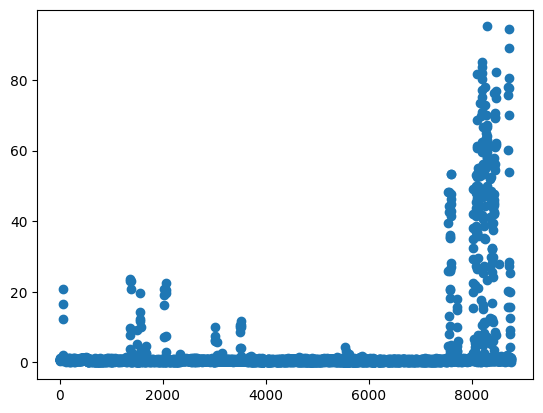

In [ ]:
plt.scatter(data1.index,data1['Space Cooling Power (kW)'], label='Scatter Plot')

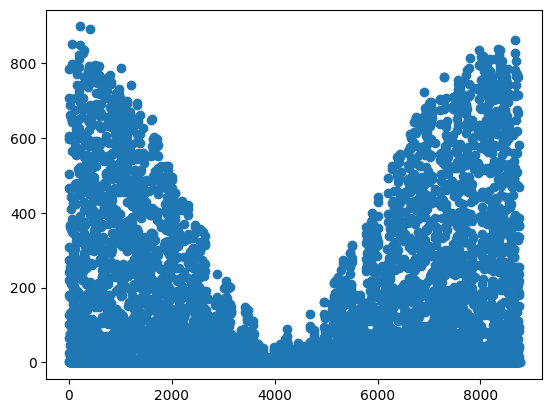

In [ ]:
plt.scatter(data1.index,data1['Global Radiation (W/m2)'], label='Scatter Plot')

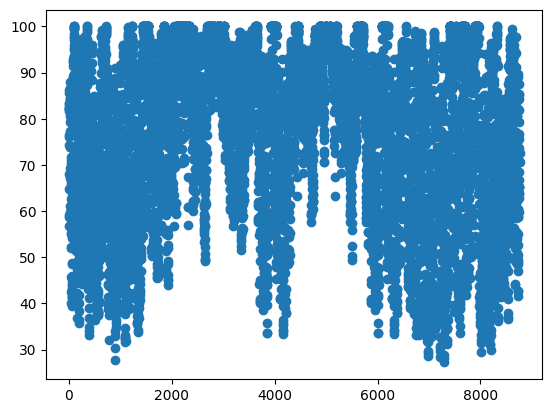

In [ ]:
plt.scatter(data1.index,data1['Relative Humidity (%)'], label='Scatter Plot')

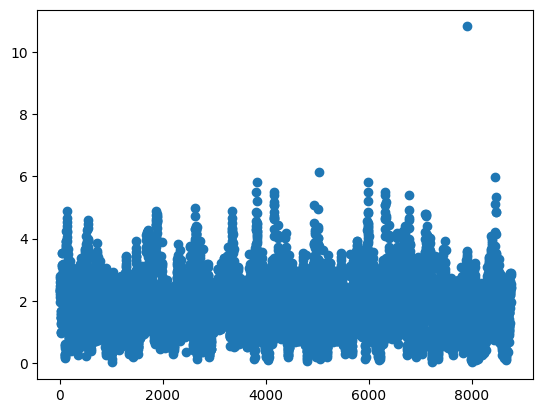

In [ ]:
plt.scatter(data1.index,data1['Wind Speed (m/s)'], label='Scatter Plot')

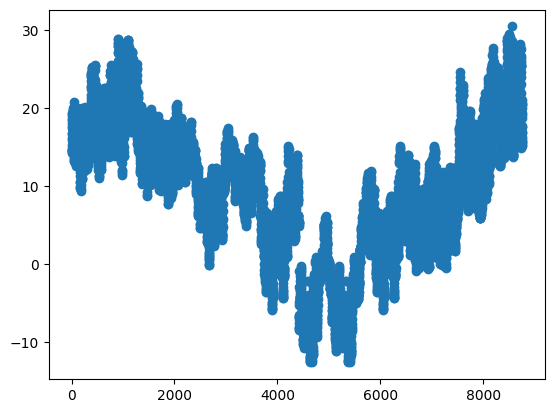

In [ ]:
plt.scatter(data1.index,data1['Outdoor Temperature (˚C)'], label='Scatter Plot')

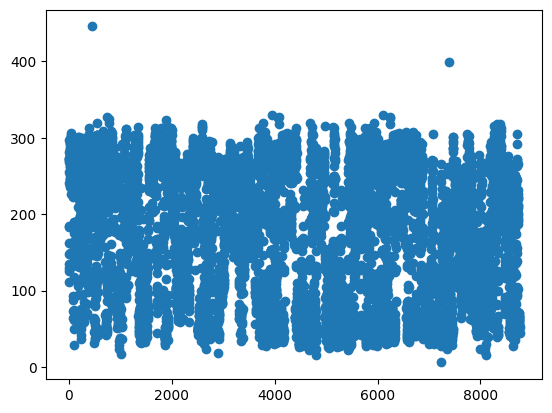

In [ ]:
plt.scatter(data1.index,data1['Wind Direction (degree)'], label='Scatter Plot')

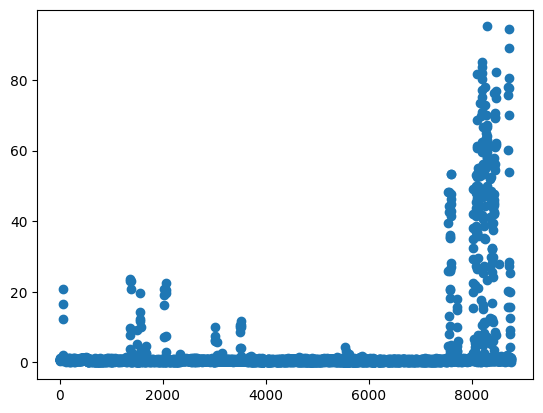

In [ ]:
plt.scatter(data1.index,data1['Space Cooling Power (kW)'], label='Scatter Plot')

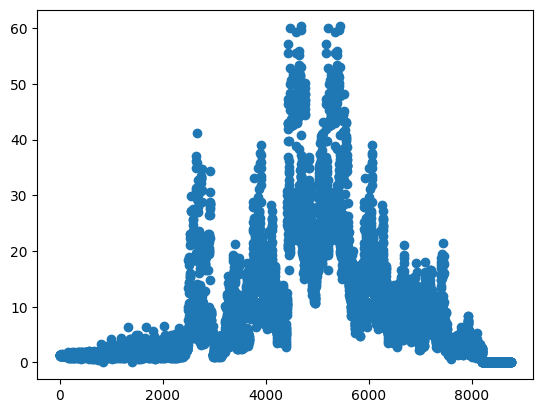

In [ ]:
plt.scatter(data1.index,data1['Space heating \npower (kW)\n'], label='Scatter Plot')

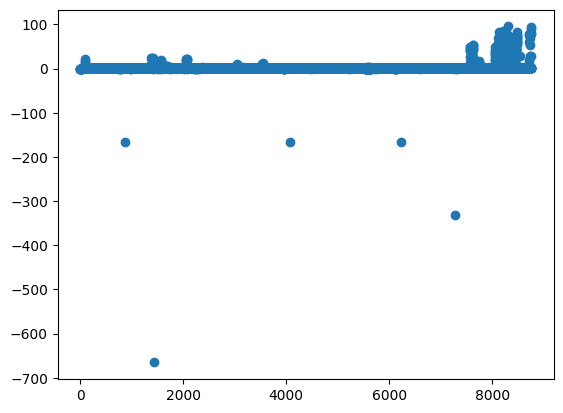

In [ ]:
plt.scatter(data1.index,data1['previous_day_cooling_load(kW)'], label='Scatter Plot')

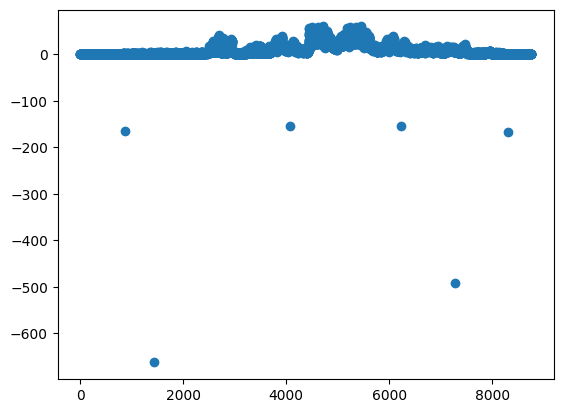

In [ ]:
plt.scatter(data1.index,data1['Previous day heating load(kW)'], label='Scatter Plot')

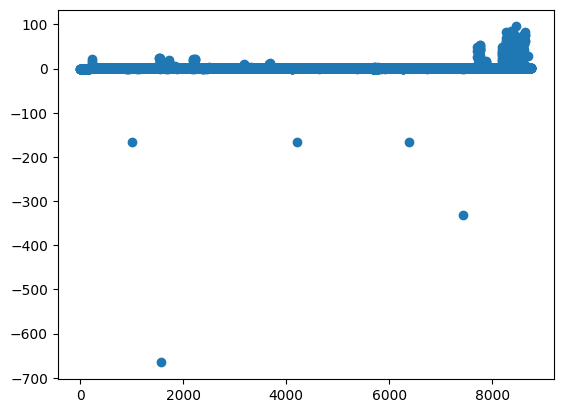

In [ ]:
plt.scatter(data1.index,data1['Previous week cooling'], label='Scatter Plot')

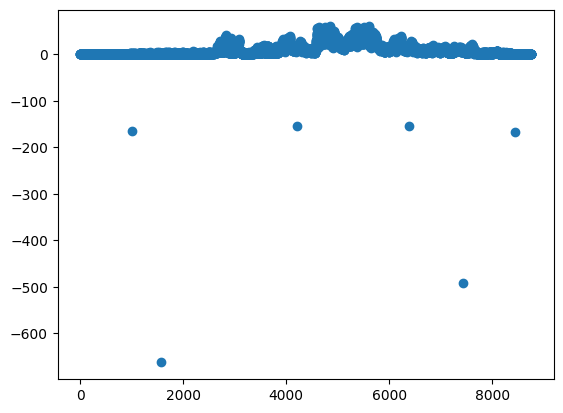

In [ ]:
plt.scatter(data1.index,data1['Previous week heating'], label='Scatter Plot')

In [ ]:
# Data Cleaning
condition3 = data1['Previous week heating']>=0
condition4 = data1['Previous week heating']<=100
data1 = data1[condition3 & condition4]

condition5 = data1['Previous week cooling']>=0
condition6 = data1['Previous week cooling']<=100
data1 = data1[condition5 & condition6]

condition7 = data1['Previous day heating load(kW)']>=0
condition8 = data1['Previous day heating load(kW)']<=100
data1 = data1[condition7 & condition8]

condition9 = data1['previous_day_cooling_load(kW)']>=0
condition10 = data1['previous_day_cooling_load(kW)']<=100
data1 = data1[condition9 & condition10]

condition11 = data1['Space heating \npower (kW)\n']>=0
condition12 = data1['Space heating \npower (kW)\n']<=100
data1 = data1[condition11 & condition12]


condition13 = data1['Wind Direction (degree)']>=0
condition14 = data1['Wind Direction (degree)']<=360
data1 = data1[condition13 & condition14]



condition15 = data1['Wind Speed (m/s)']>=0
condition16 = data1['Wind Speed (m/s)']<=8
data1 = data1[condition15 & condition16]

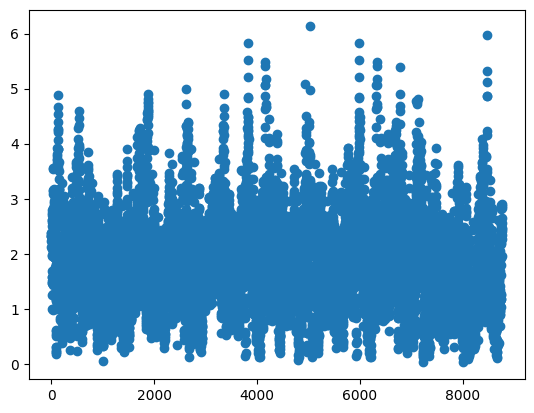

In [ ]:
plt.scatter(data1.index,data1['Wind Speed (m/s)'], label='Scatter Plot')

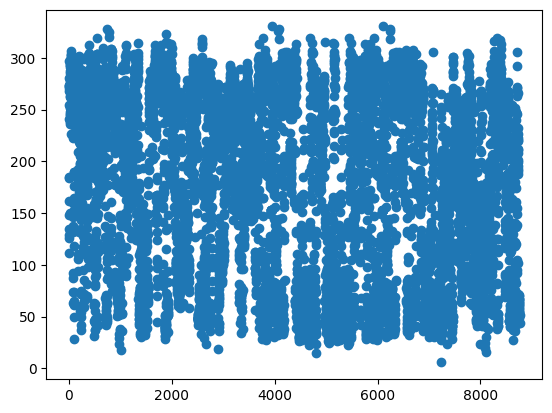

In [ ]:
plt.scatter(data1.index,data1['Wind Direction (degree)'], label='Scatter Plot')

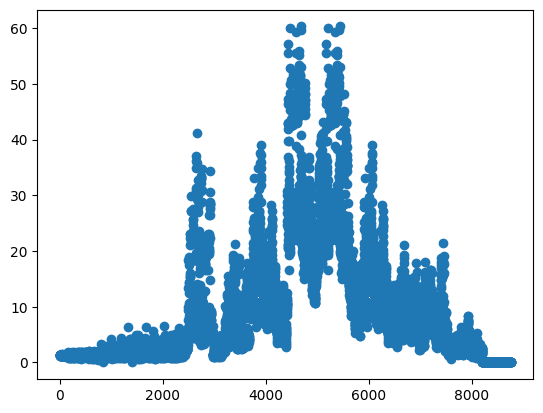

In [ ]:
plt.scatter(data1.index,data1['Space heating \npower (kW)\n'], label='Scatter Plot')

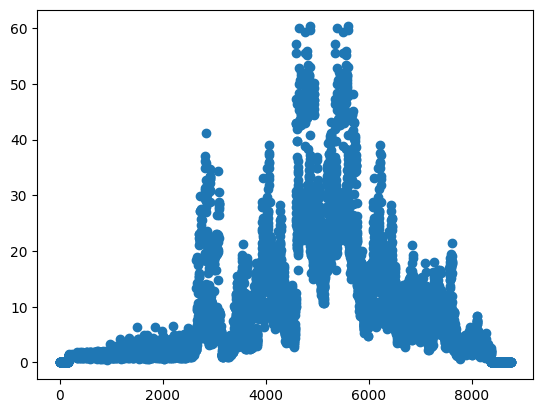

In [ ]:
plt.scatter(data1.index,data1['Previous week heating'], label='Scatter Plot')

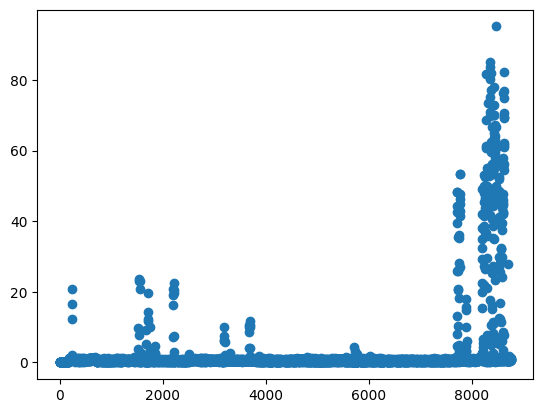

In [ ]:
plt.scatter(data1.index,data1['Previous week cooling'], label='Scatter Plot')

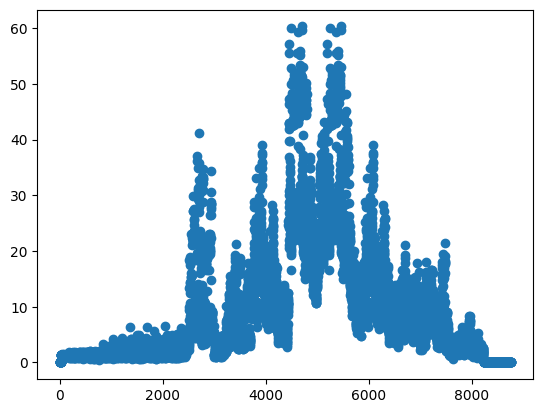

In [ ]:
plt.scatter(data1.index,data1['Previous day heating load(kW)'], label='Scatter Plot')

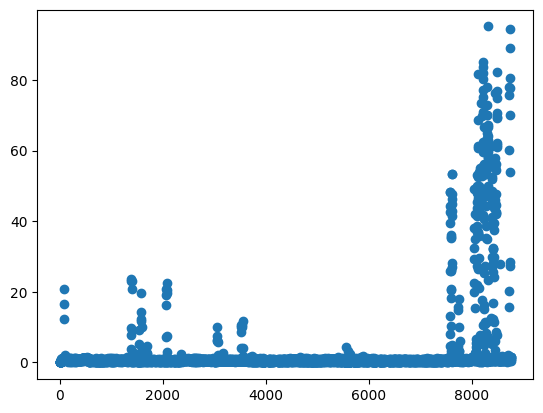

In [ ]:
plt.scatter(data1.index,data1['previous_day_cooling_load(kW)'], label='Scatter Plot')

In [ ]:
data1.corr()

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Wind Direction (degree),Space Cooling Power (kW),Volumetric flow- energy carrier for space cooling (m3/h),Space heating \npower (kW)\n,Volumetric flow- energy carrier for space heating (m3/h),previous_day_cooling_load(kW),Previous day heating load(kW),Previous week cooling,Previous week heating
Day,1.000000,-0.001753,-0.506987,0.000254,0.865910,-0.114393,0.050497,-0.024900,-0.249900,-0.180135,0.209227,0.310112,0.186280,0.101927,0.208810,0.194811,0.209281,0.245359
Hour,-0.001753,1.000000,-0.000012,0.000065,-0.000984,-0.244334,-0.022915,0.135479,0.121787,-0.011657,0.062666,0.046512,0.001447,0.011614,0.062060,0.001565,0.064640,0.001253
month,-0.506987,-0.000012,1.000000,-0.010100,-0.868155,0.006889,-0.058109,0.003757,0.431109,0.187887,-0.021617,-0.076270,-0.460209,-0.361058,-0.020171,-0.462165,-0.018340,-0.464505
Weekend/weekday,0.000254,0.000065,-0.010100,1.000000,0.005383,-0.022894,0.010433,0.000309,0.009673,0.043069,-0.081500,-0.050881,-0.057627,-0.021283,-0.020236,0.008445,-0.077624,-0.057614
year,0.865910,-0.000984,-0.868155,0.005383,1.000000,-0.076605,0.064629,-0.014458,-0.395534,-0.212254,0.135727,0.224027,0.376477,0.271808,0.134658,0.381274,0.130711,0.406446
Relative Humidity (%),-0.114393,-0.244334,0.006889,-0.022894,-0.076605,1.000000,-0.459981,-0.261831,-0.363855,-0.069740,-0.230854,-0.215583,0.214833,0.163317,-0.173131,0.201047,-0.142592,0.200463
Global Radiation (W/m2),0.050497,-0.022915,-0.058109,0.010433,0.064629,-0.459981,1.000000,0.122324,0.429042,-0.000568,0.250308,0.240397,-0.261081,-0.213383,0.241439,-0.251889,0.193170,-0.232149
Wind Speed (m/s),-0.024900,0.135479,0.003757,0.000309,-0.014458,-0.261831,0.122324,1.000000,-0.024707,0.035527,0.041114,-0.009982,0.048421,0.012569,0.029136,0.047809,0.046549,-0.003779
Outdoor Temperature (˚C),-0.249900,0.121787,0.431109,0.009673,-0.395534,-0.363855,0.429042,-0.024707,1.000000,0.296535,0.246271,0.255269,-0.832405,-0.660876,0.219342,-0.792045,0.212702,-0.669009
Wind Direction (degree),-0.180135,-0.011657,0.187887,0.043069,-0.212254,-0.069740,-0.000568,0.035527,0.296535,1.000000,0.040487,0.013605,-0.310561,-0.246742,0.004942,-0.238450,0.036389,-0.124370


In [ ]:
data1

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Wind Direction (degree),Space Cooling Power (kW),Volumetric flow- energy carrier for space cooling (m3/h),Space heating \npower (kW)\n,Volumetric flow- energy carrier for space heating (m3/h),previous_day_cooling_load(kW),Previous day heating load(kW),Previous week cooling,Previous week heating
0,1,1,7,0,20,85.566667,0.10,2.373333,14.588333,268.250000,1.048333,0.302,1.346667,0.080167,0.000000,0.000000,0.000,0.0
1,1,2,7,0,20,82.483333,3.53,2.381667,14.883333,272.400000,0.931667,0.234,1.286667,0.075167,0.000000,0.000000,0.000,0.0
2,1,3,7,0,20,82.100000,24.09,2.123333,14.653333,280.916667,0.555000,0.181,1.351667,0.080333,0.000000,0.000000,0.000,0.0
3,1,4,7,0,20,83.433333,64.10,2.330000,14.268333,271.033333,0.596667,0.177,1.288333,0.077000,0.000000,0.000000,0.000,0.0
4,1,5,7,0,20,82.100000,101.54,2.328333,14.406667,272.816667,0.666667,0.194,1.283333,0.076500,0.000000,0.000000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,20,6,0,21,68.483333,13.96,2.905000,16.733333,63.550000,1.221667,0.796,0.008333,0.005333,1.423333,0.000000,1.080,0.0
8756,365,21,6,0,21,73.733333,2.62,2.555000,16.081667,51.366667,1.016667,1.043,0.000000,0.005500,0.288333,0.008333,0.740,0.0
8757,365,22,6,0,21,75.683333,0.11,2.450000,15.741667,49.116667,0.720000,0.977,0.000000,0.004833,1.500000,0.000000,0.625,0.0
8758,365,23,6,0,21,72.566667,0.00,2.415000,15.550000,51.866667,0.783333,0.973,0.000000,0.003667,1.531667,0.000000,0.720,0.0


In [ ]:
x1 = data1.drop(columns=['Space Cooling Power (kW)','Volumetric flow- energy carrier for space cooling (m3/h)','Volumetric flow- energy carrier for space heating (m3/h)','Wind Direction (degree)','Previous day heating load(kW)','Previous week heating'])

In [ ]:
y1 = data1['Space Cooling Power (kW)']

In [ ]:
y24_real = data1['Space Cooling Power (kW)'].tail(24)

In [ ]:
y24_real

8736     0.975000
8737     1.021667
8738     1.057627
8739     0.850000
8740     1.145000
8741     0.940000
8742     0.771667
8743     0.606667
8744     0.913333
8745     1.115000
8746     1.046667
8747     8.011667
8748    12.611667
8749    15.590000
8750    25.303636
8751    19.880000
8752     9.313333
8753     4.448333
8754     1.271667
8755     1.221667
8756     1.016667
8757     0.720000
8758     0.783333
8759     0.140000
Name: Space Cooling Power (kW), dtype: float64

In [ ]:
y24_real.values

array([ 0.975     ,  1.02166667,  1.05762712,  0.85      ,  1.145     ,
        0.94      ,  0.77166667,  0.60666667,  0.91333333,  1.115     ,
        1.04666667,  8.01166667, 12.61166667, 15.59      , 25.30363636,
       19.88      ,  9.31333333,  4.44833333,  1.27166667,  1.22166667,
        1.01666667,  0.72      ,  0.78333333,  0.14      ])

In [ ]:
y24_real =y24_real.values

In [ ]:
y1.tail(24)

8736     0.975000
8737     1.021667
8738     1.057627
8739     0.850000
8740     1.145000
8741     0.940000
8742     0.771667
8743     0.606667
8744     0.913333
8745     1.115000
8746     1.046667
8747     8.011667
8748    12.611667
8749    15.590000
8750    25.303636
8751    19.880000
8752     9.313333
8753     4.448333
8754     1.271667
8755     1.221667
8756     1.016667
8757     0.720000
8758     0.783333
8759     0.140000
Name: Space Cooling Power (kW), dtype: float64

In [ ]:
y1 = y1.values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
x1_normalized = scaler.fit_transform(x1)

y1_normalized = scaler.fit_transform(y1)


#Transpose the data to put all features in the rows and all samples in the columns
x1_normalized = x1_normalized.T     # .T Transpose a numpy array

y1_normalized = y1_normalized.T

In [ ]:
x1_normalized

array([[0.        , 0.        , 0.        , ..., 0.99726027, 0.99726027,
        1.        ],
       [0.04347826, 0.08695652, 0.13043478, ..., 0.95652174, 1.        ,
        0.        ],
       [0.54545455, 0.54545455, 0.54545455, ..., 0.45454545, 0.45454545,
        0.54545455],
       ...,
       [0.02232599, 0.02133127, 0.02240889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01576293, 0.0160957 ,
        0.01141936],
       [0.        , 0.        , 0.        , ..., 0.00656789, 0.0075662 ,
        0.01240017]])

In [ ]:
x1_normalized = pd.DataFrame(x1_normalized)

In [ ]:
x1_normalized

,0,1,2,3,4,5,6,7,8,9,...,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,1.000000
1,0.043478,0.086957,0.130435,0.173913,0.217391,0.260870,0.304348,0.347826,0.391304,0.434783,...,0.652174,0.695652,0.739130,0.782609,0.826087,0.869565,0.913043,0.956522,1.000000,0.000000
2,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,...,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.545455
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.801695,0.759331,0.754065,0.772384,0.754065,0.758186,0.769407,0.747195,0.676208,0.670712,...,0.503633,0.500114,0.521182,0.447447,0.488207,0.566980,0.639112,0.665903,0.623082,0.596061
6,0.000111,0.003934,0.026850,0.071443,0.113172,0.201968,0.269131,0.520508,0.305321,0.674773,...,0.283565,0.264584,0.205713,0.104634,0.044192,0.015559,0.002920,0.000123,0.000000,0.000067
7,0.384825,0.386190,0.343886,0.377729,0.377456,0.375273,0.361354,0.319323,0.444596,0.404749,...,0.400506,0.429039,0.379640,0.466430,0.458788,0.471889,0.414574,0.397380,0.391648,0.317686
8,0.631870,0.638721,0.633380,0.624439,0.627651,0.630438,0.633457,0.647972,0.666821,0.679594,...,0.782122,0.766489,0.742491,0.728247,0.703476,0.681684,0.666551,0.658655,0.654203,0.646540
9,0.022326,0.021331,0.022409,0.021359,0.021276,0.021027,0.022989,0.021497,0.021746,0.019397,...,0.000000,0.000000,0.000166,0.000000,0.000000,0.000138,0.000000,0.000000,0.000000,0.000000


In [ ]:
y1_normalized

array([[0.01101653, 0.00979053, 0.00583228, ..., 0.0075662 , 0.00823175,
        0.00147121]])

In [ ]:
y1_normalized = pd.DataFrame(y1_normalized)

In [ ]:
y1_normalized

,0,1,2,3,4,5,6,7,8,9,...,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744
0,0.011017,0.009791,0.005832,0.00627,0.007006,0.008249,0.008792,0.00599,0.01212,0.007339,...,0.265906,0.208911,0.09787,0.046746,0.013363,0.012838,0.010684,0.007566,0.008232,0.001471


In [ ]:
y24 =y1_normalized.loc[:,8721:]

In [ ]:
y24

,8721,8722,8723,8724,8725,8726,8727,8728,8729,8730,...,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744
0,0.010246,0.010736,0.011114,0.008932,0.012032,0.009878,0.008109,0.006375,0.009598,0.011717,...,0.265906,0.208911,0.09787,0.046746,0.013363,0.012838,0.010684,0.007566,0.008232,0.001471


In [ ]:
y24.values

array([[0.0102459 , 0.0107363 , 0.0111142 , 0.00893232, 0.01203237,
        0.0098781 , 0.00810915, 0.00637523, 0.00959787, 0.01171711,
        0.01099902, 0.08419154, 0.13253118, 0.16382934, 0.26590622,
        0.20891131, 0.09787025, 0.04674583, 0.01336346, 0.01283803,
        0.01068376, 0.0075662 , 0.00823175, 0.00147121]])

In [ ]:
y24=y24.values

In [ ]:
y24

array([[0.0102459 , 0.0107363 , 0.0111142 , 0.00893232, 0.01203237,
        0.0098781 , 0.00810915, 0.00637523, 0.00959787, 0.01171711,
        0.01099902, 0.08419154, 0.13253118, 0.16382934, 0.26590622,
        0.20891131, 0.09787025, 0.04674583, 0.01336346, 0.01283803,
        0.01068376, 0.0075662 , 0.00823175, 0.00147121]])

In [ ]:
x24 = x1_normalized.loc[:,8721:]

In [ ]:
x24

,8721,8722,8723,8724,8725,8726,8727,8728,8729,8730,...,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744
0,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,...,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,0.997260,1.000000
1,0.043478,0.086957,0.130435,0.173913,0.217391,0.260870,0.304348,0.347826,0.391304,0.434783,...,0.652174,0.695652,0.739130,0.782609,0.826087,0.869565,0.913043,0.956522,1.000000,0.000000
2,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,...,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.545455
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.754065,0.859400,0.850497,0.783604,0.798718,0.827341,0.796428,0.750859,0.716052,0.679643,...,0.503633,0.500114,0.521182,0.447447,0.488207,0.566980,0.639112,0.665903,0.623082,0.596061
6,0.000145,0.003277,0.018468,0.048806,0.093857,0.168320,0.199706,0.242806,0.373899,0.646508,...,0.283565,0.264584,0.205713,0.104634,0.044192,0.015559,0.002920,0.000123,0.000000,0.000067
7,0.363264,0.394924,0.411119,0.309771,0.353712,0.455513,0.356714,0.383734,0.371452,0.405295,...,0.400506,0.429039,0.379640,0.466430,0.458788,0.471889,0.414574,0.397380,0.391648,0.317686
8,0.741601,0.707192,0.676423,0.641508,0.638412,0.643985,0.656216,0.670228,0.685400,0.700147,...,0.782122,0.766489,0.742491,0.728247,0.703476,0.681684,0.666551,0.658655,0.654203,0.646540
9,0.000000,0.000000,0.000000,0.000000,0.000166,0.000000,0.000000,0.000138,0.000000,0.000000,...,0.000000,0.000000,0.000166,0.000000,0.000000,0.000138,0.000000,0.000000,0.000000,0.000000


In [ ]:
x24 = x24.values

In [ ]:
x24

array([[9.97260274e-01, 9.97260274e-01, 9.97260274e-01, 9.97260274e-01,
        9.97260274e-01, 9.97260274e-01, 9.97260274e-01, 9.97260274e-01,
        9.97260274e-01, 9.97260274e-01, 9.97260274e-01, 9.97260274e-01,
        9.97260274e-01, 9.97260274e-01, 9.97260274e-01, 9.97260274e-01,
        9.97260274e-01, 9.97260274e-01, 9.97260274e-01, 9.97260274e-01,
        9.97260274e-01, 9.97260274e-01, 9.97260274e-01, 1.00000000e+00],
       [4.34782609e-02, 8.69565217e-02, 1.30434783e-01, 1.73913043e-01,
        2.17391304e-01, 2.60869565e-01, 3.04347826e-01, 3.47826087e-01,
        3.91304348e-01, 4.34782609e-01, 4.78260870e-01, 5.21739130e-01,
        5.65217391e-01, 6.08695652e-01, 6.52173913e-01, 6.95652174e-01,
        7.39130435e-01, 7.82608696e-01, 8.26086957e-01, 8.69565217e-01,
        9.13043478e-01, 9.56521739e-01, 1.00000000e+00, 0.00000000e+00],
       [4.54545455e-01, 4.54545455e-01, 4.54545455e-01, 4.54545455e-01,
        4.54545455e-01, 4.54545455e-01, 4.54545455e-01, 4.5454

In [ ]:
data=data1.loc[0:8735,:]

In [ ]:
data

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Wind Direction (degree),Space Cooling Power (kW),Volumetric flow- energy carrier for space cooling (m3/h),Space heating \npower (kW)\n,Volumetric flow- energy carrier for space heating (m3/h),previous_day_cooling_load(kW),Previous day heating load(kW),Previous week cooling,Previous week heating
0,1,1,7,0,20,85.566667,0.10,2.373333,14.588333,268.250000,1.048333,0.302,1.346667,0.080167,0.000000,0.0,0.000000,0.0
1,1,2,7,0,20,82.483333,3.53,2.381667,14.883333,272.400000,0.931667,0.234,1.286667,0.075167,0.000000,0.0,0.000000,0.0
2,1,3,7,0,20,82.100000,24.09,2.123333,14.653333,280.916667,0.555000,0.181,1.351667,0.080333,0.000000,0.0,0.000000,0.0
3,1,4,7,0,20,83.433333,64.10,2.330000,14.268333,271.033333,0.596667,0.177,1.288333,0.077000,0.000000,0.0,0.000000,0.0
4,1,5,7,0,20,82.100000,101.54,2.328333,14.406667,272.816667,0.666667,0.194,1.283333,0.076500,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,364,20,6,0,21,60.550000,26.70,1.026667,24.596667,212.066667,1.423333,1.234,0.000000,0.006333,0.950000,0.0,1.795000,0.0
8732,364,21,6,0,21,58.750000,1.50,1.180000,23.901667,220.033333,0.288333,0.981,0.008333,0.005500,0.653333,0.0,0.751667,0.0
8733,364,22,6,0,21,60.233333,0.04,1.180000,23.020000,226.633333,1.500000,1.809,0.000000,0.004000,0.578333,0.0,0.730000,0.0
8734,364,23,6,0,21,62.866667,0.00,1.786667,21.868333,266.233333,1.531667,1.554,0.000000,0.001000,1.451667,0.0,0.878333,0.0


In [ ]:
x = data.drop(columns=['Space Cooling Power (kW)','Volumetric flow- energy carrier for space cooling (m3/h)','Volumetric flow- energy carrier for space heating (m3/h)','Wind Direction (degree)','Previous day heating load(kW)','Previous week heating'])

In [ ]:
x

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Space heating \npower (kW)\n,previous_day_cooling_load(kW),Previous week cooling
0,1,1,7,0,20,85.566667,0.10,2.373333,14.588333,1.346667,0.000000,0.000000
1,1,2,7,0,20,82.483333,3.53,2.381667,14.883333,1.286667,0.000000,0.000000
2,1,3,7,0,20,82.100000,24.09,2.123333,14.653333,1.351667,0.000000,0.000000
3,1,4,7,0,20,83.433333,64.10,2.330000,14.268333,1.288333,0.000000,0.000000
4,1,5,7,0,20,82.100000,101.54,2.328333,14.406667,1.283333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8731,364,20,6,0,21,60.550000,26.70,1.026667,24.596667,0.000000,0.950000,1.795000
8732,364,21,6,0,21,58.750000,1.50,1.180000,23.901667,0.008333,0.653333,0.751667
8733,364,22,6,0,21,60.233333,0.04,1.180000,23.020000,0.000000,0.578333,0.730000
8734,364,23,6,0,21,62.866667,0.00,1.786667,21.868333,0.000000,1.451667,0.878333


In [ ]:
y = data['Space Cooling Power (kW)']

In [ ]:
y

0       1.048333
1       0.931667
2       0.555000
3       0.596667
4       0.666667
          ...   
8731    1.423333
8732    0.288333
8733    1.500000
8734    1.531667
8735    1.086667
Name: Space Cooling Power (kW), Length: 8721, dtype: float64

In [ ]:
#from sklearn.model_selection import train_test_split
#train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# from sklearn.model_selection import train_test_split
# train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = train_test_split(x, y, test_size=0.3, random_state=42)


# from sklearn.model_selection import TimeSeriesSplit
# X = np.array(x)  # Your feature matrix
# Y = np.array(y)
# # X and y are your feature matrix and target variable
# tscv = TimeSeriesSplit(n_splits=5)

# for train_index, test_index in tscv.split(X):
#     xtrain, test_set_x_orig = X[train_index], X[test_index]
#     train_set_y_orig, test_set_y_orig = Y[train_index], Y[test_index]
full_dataset = pd.concat([x, y], axis=1)

# Create groups of 5
grouped = full_dataset.groupby(np.arange(len(full_dataset)) // 5)

# Initialize empty DataFrames for train and test sets
train_set = pd.DataFrame()
test_set = pd.DataFrame()

# Iterate through groups
for name, group in grouped:
    # Randomly select one row from each group for the test set
    test_row = group.sample(1, random_state=np.random.randint(1, 1000))

    # Add the selected row to the test set
    test_set = pd.concat([test_set, test_row])

    # Add the remaining rows to the train set
    train_set = pd.concat([train_set, group.drop(test_row.index)])

# Display the resulting train and test sets
# print("Train Set:")
# print(train_set)
# print("\nTest Set:")
# print(test_set)

# Display the resulting train and test sets
# print("Train Set:")
# print(train_set)
# print("\nTest Set:")
# print(test_set)

# Split into features (x) and target (y) again if needed
train_set_x_orig, train_set_y_orig = train_set.iloc[:, :-1], train_set.iloc[:, -1]
test_set_x_orig, test_set_y_orig = test_set.iloc[:, :-1], test_set.iloc[:, -1]
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Assuming X and y are your features and target variable
# # Assuming your DataFrame is df

# # Create an array indicating every 5th row
# is_test = np.arange(len(x)) % 5 == 4

# # Split the data into train and test sets based on the condition
# train_set_x_orig, X_test, y_train, y_test = train_test_split(x[~is_test], y[~is_test], test_size=0.2, random_state=42)

# # The remaining data is already in the test set

# # Optionally, you can use the same condition to create a DataFrame for the test set
# test_set = x[is_test].reset_index(drop=True)

In [ ]:
train_set_x_orig

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Space heating \npower (kW)\n,previous_day_cooling_load(kW),Previous week cooling
1,1,2,7,0,20,82.483333,3.53,2.381667,14.883333,1.286667,0.000000,0.000000
2,1,3,7,0,20,82.100000,24.09,2.123333,14.653333,1.351667,0.000000,0.000000
3,1,4,7,0,20,83.433333,64.10,2.330000,14.268333,1.288333,0.000000,0.000000
4,1,5,7,0,20,82.100000,101.54,2.328333,14.406667,1.283333,0.000000,0.000000
5,1,6,7,0,20,82.400000,181.21,2.315000,14.526667,1.268333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8729,364,18,6,0,21,55.100000,111.92,1.616667,25.416667,0.000000,0.341667,0.293333
8730,364,19,6,0,21,58.633333,62.44,1.245000,25.560000,0.000000,1.088333,1.215000
8732,364,21,6,0,21,58.750000,1.50,1.180000,23.901667,0.008333,0.653333,0.751667
8733,364,22,6,0,21,60.233333,0.04,1.180000,23.020000,0.000000,0.578333,0.730000


In [ ]:
test_set_x_orig

,Day,Hour,month,Weekend/weekday,year,Relative Humidity (%),Global Radiation (W/m2),Wind Speed (m/s),Outdoor Temperature (˚C),Space heating \npower (kW)\n,previous_day_cooling_load(kW),Previous week cooling
0,1,1,7,0,20,85.566667,0.10,2.373333,14.588333,1.346667,0.000000,0.000000
6,1,7,7,0,20,83.216667,241.47,2.230000,14.656667,1.386667,0.000000,0.000000
11,1,12,7,0,20,74.416667,598.03,2.610000,17.376667,1.251667,0.000000,0.000000
16,1,17,7,0,20,56.866667,125.88,2.080000,19.008333,1.156667,0.000000,0.000000
20,1,21,7,0,20,77.366667,1.69,1.471667,16.173333,1.221667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8715,364,4,6,0,21,81.966667,135.19,1.148333,18.905000,0.000000,1.188333,0.685000
8722,364,11,6,0,21,42.800000,189.66,1.415000,27.578333,0.008333,15.850000,1.325000
8727,364,16,6,0,21,48.633333,217.77,1.678333,26.461667,0.000000,1.493333,1.401667
8731,364,20,6,0,21,60.550000,26.70,1.026667,24.596667,0.000000,0.950000,1.795000


In [ ]:
train_set_y_orig

1       0.931667
2       0.555000
3       0.596667
4       0.666667
5       0.785000
          ...   
8729    0.653333
8730    0.893333
8732    0.288333
8733    1.500000
8734    1.531667
Name: Space Cooling Power (kW), Length: 6976, dtype: float64

In [ ]:
train_set_y_orig = train_set_y_orig.values.reshape(-1, 1)

In [ ]:
test_set_y_orig

0        1.048333
6        0.836667
11       0.901667
16       0.695000
20       0.636667
          ...    
8715     1.098333
8722    89.188333
8727     1.223333
8731     1.423333
8735     1.086667
Name: Space Cooling Power (kW), Length: 1745, dtype: float64

In [ ]:
test_set_y_orig = test_set_y_orig.values.reshape(-1, 1)

In [ ]:
#Normalization process
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = scaler.fit_transform(test_set_x_orig)
train_set_y_normalized = scaler.fit_transform(train_set_y_orig)
test_set_y_normalized = scaler.fit_transform(test_set_y_orig)

#Transpose the data to put all features in the rows and all samples in the columns
train_set_x_normalized = train_set_x_normalized.T     # .T Transpose a numpy array
test_set_x_normalized = test_set_x_normalized.T
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 6976
Number of testing examples: m_test = 1745
train_set_x shape: (12, 6976)
train_set_y shape: (1, 6976)
test_set_x shape: (12, 1745)
test_set_y shape: (1, 1745)


In [ ]:
### CONSTANTS ###
layer1= test_set_x_orig.shape[1]
#layers_dims = [layer1,20,40,40,20, 10, 5, 1] #  6-layer model
layers_dims = [layer1,10,30,40,20, 1] #  4-layer model

In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    Z = W.dot(A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    print(len(caches))
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    #cost = -(1/m)*np.sum((np.dot(Y,np.log(AL)))+(np.dot((1-Y),(np.log(1-AL)))))
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [ ]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ


In [ ]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

In [ ]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate=0.75, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    # YOUR CODE ENDS HERE

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE

        AL,caches = L_model_forward(X, parameters)
        # YOUR CODE ENDS HERE

        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(AL, Y)
        # YOUR CODE ENDS HERE

        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...
        # YOUR CODE STARTS HERE
        grads = L_model_backward(AL, Y, caches)
        # YOUR CODE ENDS HERE

        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)

        # YOUR CODE ENDS HERE

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        p[0,i] = probas[0,i]


    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    accuracy=(100 - np.mean(np.abs(p - y)) * 100)

    # Calculate the mean squared error (MSE)
    #mse = np.mean((y - p)**2)

    # Calculate the accuracy
    #accuracy = 1 - mse/np.var(y)



    print("Accuracy: "  + str(accuracy))

    return p


In [ ]:
parameters, costs = L_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims, num_iterations = 2200, print_cost = False)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [ ]:
pred_train = predict(train_set_x_normalized, train_set_y_normalized, parameters)

4
Accuracy: 99.03969145467225


In [ ]:
pred_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

4
Accuracy: 98.98632169489814


In [ ]:
pred_train24 = predict(x24, y24, parameters)

4
Accuracy: 95.69114046767608


In [ ]:
#Reverse normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reverse the normalization to get the original data
Y_prediction_test_real_scale = scaler.inverse_transform(predict( test_set_x_normalized,test_set_y_normalized,parameters))
Y_prediction_train_real_scale = scaler.inverse_transform(predict(train_set_x_normalized,train_set_y_normalized,parameters))
Y24_prediction_test_real_scale = scaler.inverse_transform(predict(x24,y24,parameters))

4
Accuracy: 98.98632169489814
4
Accuracy: 99.03969145467225
4
Accuracy: 95.69114046767608


In [ ]:
y24

array([[0.0102459 , 0.0107363 , 0.0111142 , 0.00893232, 0.01203237,
        0.0098781 , 0.00810915, 0.00637523, 0.00959787, 0.01171711,
        0.01099902, 0.08419154, 0.13253118, 0.16382934, 0.26590622,
        0.20891131, 0.09787025, 0.04674583, 0.01336346, 0.01283803,
        0.01068376, 0.0075662 , 0.00823175, 0.00147121]])

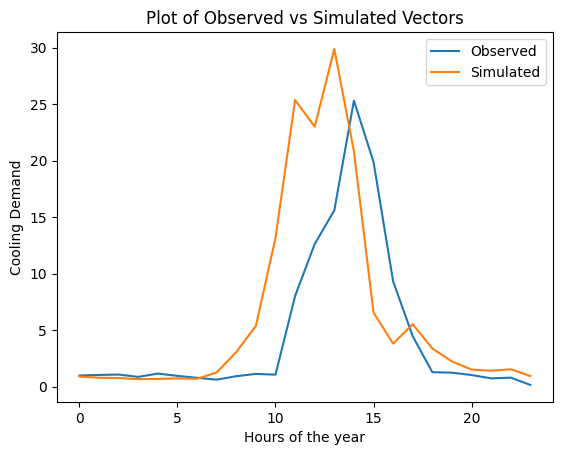

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two vectors

x = np.arange(0,24, 1)
y_1 = y24_real
y_2 = Y24_prediction_test_real_scale.T

# Plot the vectors
plt.plot(x, y_1, label='Observed')
plt.plot(x, y_2, label='Simulated')

# Add a title and labels for the x and y axes
plt.title('Plot of Observed vs Simulated Vectors')
plt.xlabel('Hours of the year')
plt.ylabel('Cooling Demand')

# Set the y-axis limits
plt.ylim()

# Add a legend
plt.legend()

# Display the plot
plt.show()